  # INFORME CORONAVIRUS

##### 0. Carga de librerias y datos

In [244]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

In [245]:
corona= pd.read_excel("CORONAVIRUS.xlsx")
corona= pd.DataFrame(corona)
corona.head()

,Tratamiento,Tipo_virus,Sexo,Edad,Glucosa,Pleocitosis,Proteinas,Plaquetas,Natremia,Dias_hospital,Dolor_cabeza,Nauseas,Desorientacion,Afasia,Crisis,Herpes
0,A,VYZ,Hombre,82,83.0,100,67.00,240000,136,40,NO,SI,NO,NO,NO,NO
1,A,VAB,Hombre,62,84.1,220,166.50,111532,132,31,SI,NO,NO,NO,NO,NO
2,A,VAB,Hombre,44,113.1,211,145.77,288199,127,22,NO,NO,NO,NO,NO,NO
3,A,VAB,Mujer,52,45.9,202,162.54,320967,128,27,SI,NO,SI,SI,NO,NO
4,B,VAB,Hombre,69,25.8,264,138.46,163466,127,16,SI,SI,SI,NO,NO,SI


##### Info datos
Antes de comenzar las cuestiones he observado que tipo de variables encontramos en nuestro dataframe: Encontramos tanto variables continuas numéricas como categóricas. Esto es interesante para ver como afrontaremos las cuestiones.

Variables continuas: EDAD ; GLUCOSA ; GLUCOSA ; PLEOCITOSIS ; PROTEINAS ; PLAQUETAS ; NATREMIA ; DIAS_H

Variables categóricas: TRATAMIENTO; TIPO_VIRUS; SEXO; EFECTOS SECUNDARIOS...

In [246]:
corona.shape

(250, 16)

In [247]:
corona.dtypes

Tratamiento        object
Tipo_virus         object
Sexo               object
Edad                int64
Glucosa           float64
Pleocitosis         int64
Proteinas         float64
Plaquetas           int64
Natremia            int64
Dias_hospital       int64
Dolor_cabeza       object
Nauseas            object
Desorientacion     object
Afasia             object
Crisis             object
Herpes             object
dtype: object

In [248]:
corona.isna().sum(axis=0)
# Si lo ponemos en el axis=1 entonces nos hace la suma en horizontal es decir nos lo haría por cada fila y no por columnas

Tratamiento       0
Tipo_virus        0
Sexo              0
Edad              0
Glucosa           0
Pleocitosis       0
Proteinas         0
Plaquetas         0
Natremia          0
Dias_hospital     0
Dolor_cabeza      0
Nauseas           0
Desorientacion    0
Afasia            0
Crisis            0
Herpes            0
dtype: int64

#### CUESTIONES

###### 1) Dibuje el gráfico de densidad de la edad.

<AxesSubplot:xlabel='Edad', ylabel='Count'>

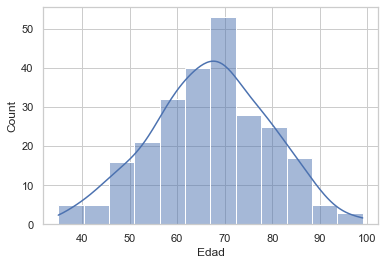

In [249]:
sns.histplot(data=corona.Edad, kde=True)

##### 2) ¿Cuál es la edad media de los contagiados por el virus? ¿Y según hombres y mujeres? 


In [250]:
bySex = corona.groupby(["Sexo"])
bySex.mean().Edad

Sexo
Hombre    65.666667
Mujer     69.447059
Name: Edad, dtype: float64

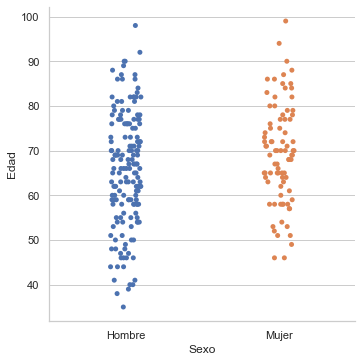

In [251]:
sns.catplot(x="Sexo", y="Edad", data=corona)

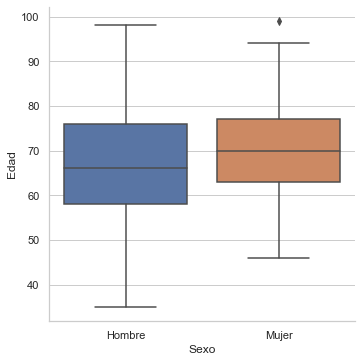

In [252]:
sns.catplot(x="Sexo", y="Edad", kind="box", data=corona)

#### 3 ¿A qué género de la población está afectando más estos dos virus?  



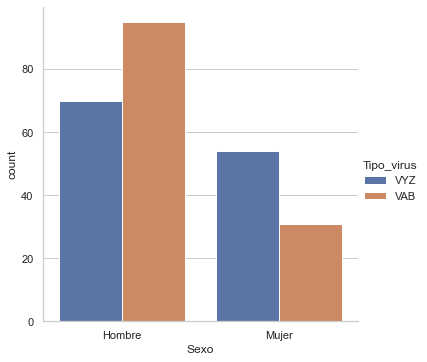

In [253]:
sns.catplot(x="Sexo", kind="count", hue="Tipo_virus", data=corona)

##### ¿Es el mismo comportamiento para ambos virus?

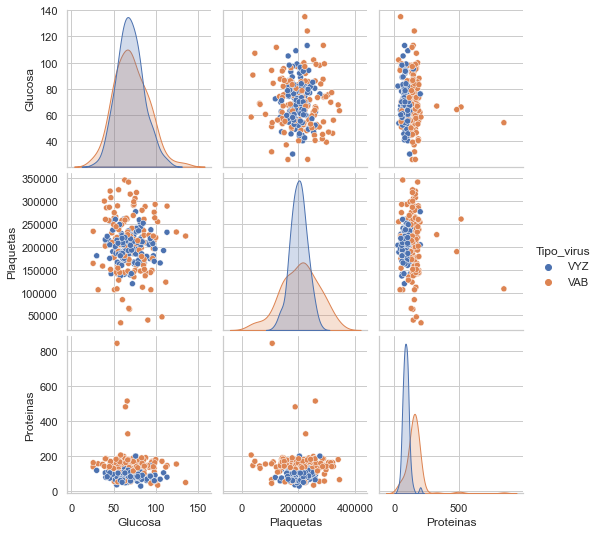

In [254]:
ndataframe = pd.DataFrame(corona[["Glucosa", "Plaquetas", "Proteinas", "Tipo_virus"]])
sns.pairplot(ndataframe, hue="Tipo_virus")

#### 4) ¿Afecta el tipo de virus a los valores de glucosa de los pacientes? ¿y la natremia, y el Sexo?


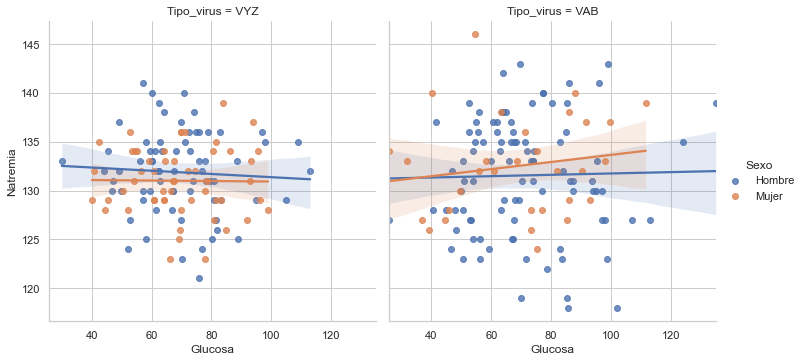

In [255]:
sns.lmplot(x="Glucosa", y="Natremia", col="Tipo_virus", hue="Sexo", data=corona)

#### 5) ¿Existen pacientes con valores de glucosa fuera de la normalidad? ¿En qué porcentaje?

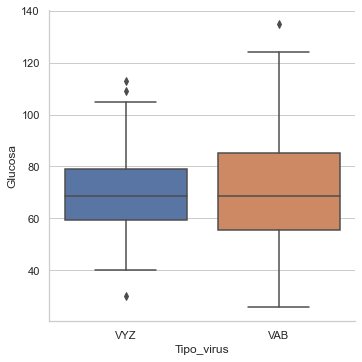

In [256]:
sns.catplot(x="Tipo_virus", y="Glucosa", kind="box", data=corona)

Tipo_virus
VAB    0.555556
VYZ    0.653226
dtype: float64

#### 6) ¿Hay diferencias en los valores de Plaquetas de los pacientes debido al tipo de virus, y al sexo?

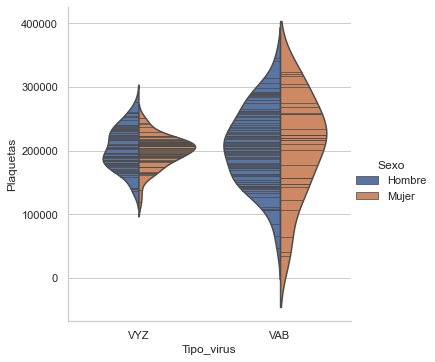

In [257]:
sns.catplot(x="Tipo_virus", y="Plaquetas", hue="Sexo", kind="violin", inner="stick", split=True, data=corona)

#### 7) ¿Hay diferencias entre los días de hospitalización dependiendo del tratamiento utilizado? ¿y en función del Sexo?

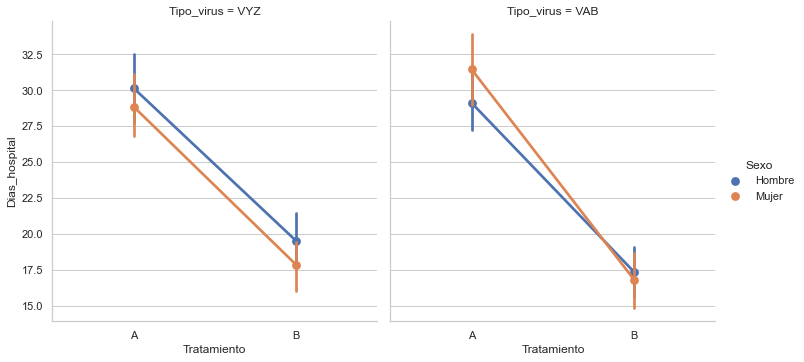

In [258]:
sns.catplot(x="Tratamiento", y="Dias_hospital", hue="Sexo", col="Tipo_virus", kind="point", data=corona)

#### 8) ¿Existe una asociación entre los días de hospitalización y la edad de los pacientes? ¿El sexo influye?

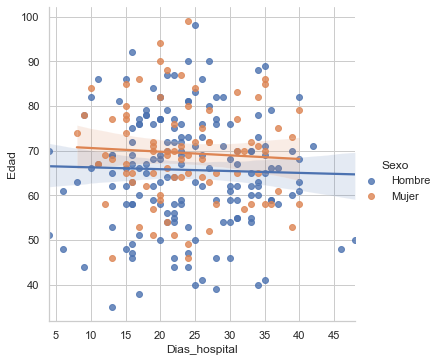

In [259]:
sns.lmplot(x="Dias_hospital", y="Edad", hue="Sexo", data=corona)


#### 9) ¿A qué porcentaje de pacientes estos tratamientos les provoca dolor de cabeza? 


In [260]:
Grouped = pd.DataFrame()
Grouped["Porcentaje"] = corona.groupby("Tratamiento").Dolor_cabeza.value_counts() / corona.groupby("Tratamiento").Dolor_cabeza.count()

#Grouped = pd.DataFrame(Grouped["Porcentaje"])
Grouped

Porcentaje
Tratamiento Dolor_cabeza            
A           NO              0.801587
            SI              0.198413
B           NO              0.564516
            SI              0.435484

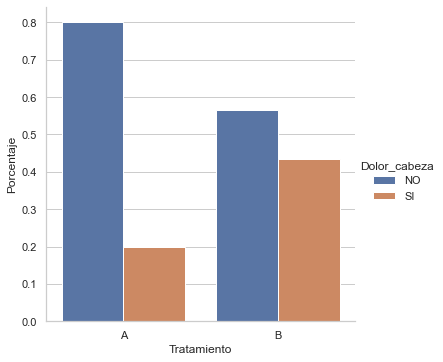

In [261]:
sns.catplot(x="Tratamiento", y="Porcentaje", hue="Dolor_cabeza", kind="bar", data=Grouped.reset_index())

#### 10)¿Están relacionadas las proteínas con las plaquetas?. 

<AxesSubplot:xlabel='Proteinas', ylabel='Plaquetas'>

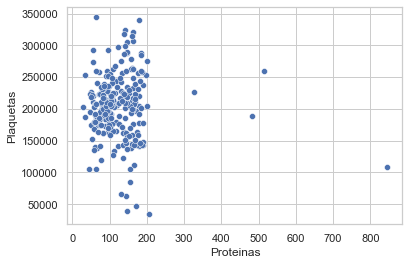

In [262]:
sns.scatterplot(x="Proteinas", y="Plaquetas", data=corona)

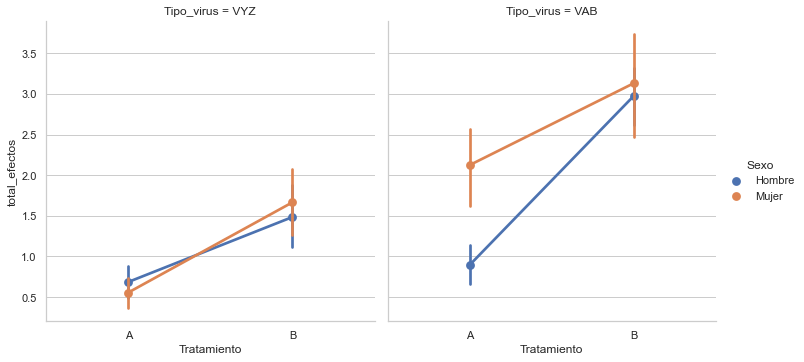

In [263]:
corona["total_efectos"] = (corona[["Dolor_cabeza", "Nauseas", "Desorientacion", "Afasia", "Crisis", "Herpes"]] == "SI").sum(axis=1)

sns.catplot(x="Tratamiento", y="total_efectos", hue="Sexo", col="Tipo_virus", kind="point", data=corona)
